In [15]:
# Notebook setup
import requests
import os
import re
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

# Make the Plots pretty
import seaborn as sns
sns.set()

# Supress open_mfdataset warnings
import warnings
warnings.filterwarnings('ignore')

In [16]:
I_URL = 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/sbeaulieu@whoi.edu/20200806T132326640Z-CP03ISPM-WFP01-03-CTDPFK000-recovered_wfp-ctdpf_ckl_wfp_instrument_recovered/deployment0003_CP03ISPM-WFP01-03-CTDPFK000-recovered_wfp-ctdpf_ckl_wfp_instrument_recovered_20191006T150003-20191031T212239.977728.nc#fillmismatch'
CI_URL = 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/sbeaulieu@whoi.edu/20200806T132900316Z-CP02PMCI-WFP01-03-CTDPFK000-recovered_wfp-ctdpf_ckl_wfp_instrument_recovered/deployment0013_CP02PMCI-WFP01-03-CTDPFK000-recovered_wfp-ctdpf_ckl_wfp_instrument_recovered_20191007T210003-20191031T212442.986087.nc#fillmismatch'
CO_URL = 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/sbeaulieu@whoi.edu/20200806T133142674Z-CP02PMCO-WFP01-03-CTDPFK000-recovered_wfp-ctdpf_ckl_wfp_instrument_recovered/deployment0013_CP02PMCO-WFP01-03-CTDPFK000-recovered_wfp-ctdpf_ckl_wfp_instrument_recovered_20191008T140003-20191031T212529.983845.nc#fillmismatch'
O_URL = 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/sbeaulieu@whoi.edu/20200806T133343088Z-CP04OSPM-WFP01-03-CTDPFK000-recovered_wfp-ctdpf_ckl_wfp_instrument_recovered/deployment0012_CP04OSPM-WFP01-03-CTDPFK000-recovered_wfp-ctdpf_ckl_wfp_instrument_recovered_20191013T160003-20191031T211622.990750.nc#fillmismatch'

In [17]:
ids = xr.open_dataset(I_URL)
cids = xr.open_dataset(CI_URL)
cods = xr.open_dataset(CO_URL)
ods = xr.open_dataset(O_URL)

In [18]:
ids = ids.swap_dims({'obs': 'time'}) #Swap dimensions
cids = cids.swap_dims({'obs': 'time'}) #Swap dimensions
cods = cods.swap_dims({'obs': 'time'}) #Swap dimensions
ods = ods.swap_dims({'obs': 'time'}) #Swap dimensions

In [36]:
ids.practical_salinity
#cids.ctdpf_ckl_seawater_pressure
#cods.ctdpf_ckl_seawater_pressure
#ods.ctdpf_ckl_seawater_pressure

<xarray.DataArray 'practical_salinity' (time: 158237)>
[158237 values with dtype=float64]
Coordinates:
    obs       (time) int32 0 1 2 3 4 5 ... 158232 158233 158234 158235 158236
    lon       (time) float64 ...
    pressure  (time) float64 ...
    lat       (time) float64 ...
  * time      (time) datetime64[ns] 2019-10-06T15:00:03 ... 2019-10-31T21:22:...
Attributes:
    comment:                  Salinity is generally defined as the concentrat...
    long_name:                Practical Salinity
    precision:                4
    data_product_identifier:  PRACSAL_L2
    standard_name:            sea_water_practical_salinity
    units:                    1
    ancillary_variables:      pressure conductivity temperature
    _ChunkSizes:              10000

In [20]:
# select same day for each profiler
ids15=ids.sel(time="2019-10-15")
cids15=cids.sel(time="2019-10-15")
cods15=cods.sel(time="2019-10-15")
ods15=ods.sel(time="2019-10-15")

## Plot one day of obs in one figure to compare timing of profilers

Text(0.5, 1.0, 'offshore')

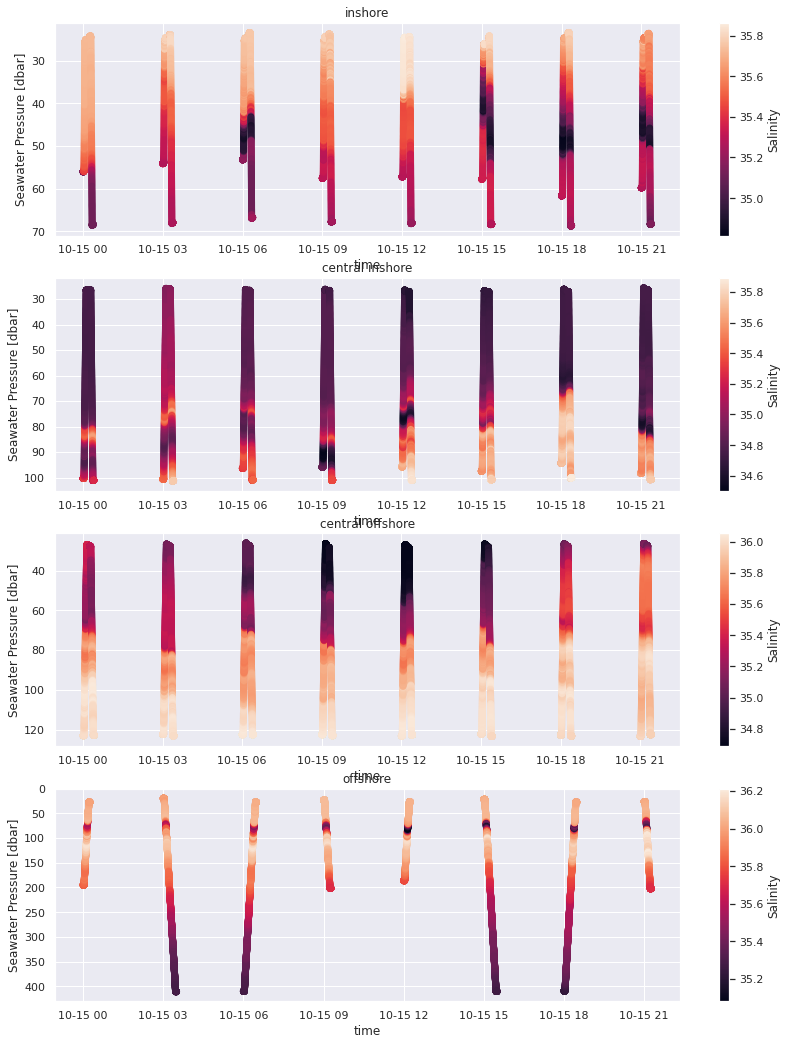

In [35]:
plt.subplots(figsize=[14,18])

plt.subplot(411)
cci=ids15.plot.scatter(x="time", y="ctdpf_ckl_seawater_pressure", c=ids15.practical_salinity.data)
plt.gca().invert_yaxis()
plt.colorbar(cci, label='Salinity')
plt.title('inshore')

plt.subplot(412)
ccci=cids15.plot.scatter(x="time", y="ctdpf_ckl_seawater_pressure", c=cids15.practical_salinity.data)
plt.gca().invert_yaxis()
plt.colorbar(ccci, label='Salinity')
plt.title('central inshore')

plt.subplot(413)
ccco=cods15.plot.scatter(x="time", y="ctdpf_ckl_seawater_pressure", c=cods15.practical_salinity.data)
plt.gca().invert_yaxis()
plt.colorbar(ccco, label='Salinity')
plt.title('central offshore')

plt.subplot(414)
cco=ods15.plot.scatter(x="time", y="ctdpf_ckl_seawater_pressure", c=ods15.practical_salinity.data)
plt.gca().invert_yaxis()
plt.colorbar(cco, label='Salinity')
plt.title('offshore')

### next step: take just the second profile of each? Plot depth vs. horizontal distance?

In [56]:
T1="2019-10-15T01:00:00"
T2="2019-10-15T05:00:00"

#idsT=ids15.sel(time=slice("2019-10-15T01:00:00", "2019-10-15T05:00:00"))
idsT=ids15.sel(time=slice(T1, T2))

Text(0.5, 1.0, 'inshore')

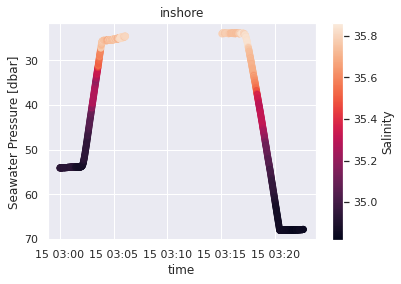

In [57]:
idsT.plot.scatter(x="time", y="ctdpf_ckl_seawater_pressure", c=idsT.practical_salinity.data)
plt.gca().invert_yaxis()
plt.colorbar(cci, label='Salinity')
plt.title('inshore')

### mean salinity at each depth?